<a href="https://colab.research.google.com/github/GUC-DM/w22-mini-project-3-samaa-soliman-t06-nada-bakeer-t06/blob/main/Clustering_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 170.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/NadaBakeer/selectedProjects/refs/heads/main/data/music_genres.csv')
df.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


**Data Cleaning**

In [3]:
#Converting the duration unit from ms into minutes
df['duration_ms']=(df['duration_ms']/(1000*60))%60

In [4]:
#Changing duration_ms name into duration in minutes and loudness into loudness in dB
#Changing popularity name into popularity in % since it's range is from 0 to 100 and the maximum value in df was 80 so it was concluded a percentage
df.rename(columns={'duration_ms': 'duration in minutes'}, inplace=True)
df.rename(columns={'loudness': 'loudness in dB'}, inplace=True)
df.rename(columns={'popularity': 'popularity in %'}, inplace=True)

In [5]:
df

,genres,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness in dB,speechiness,tempo,valence,popularity in %,key
0,21st century classical,0.979333,0.162883,2.671628,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,432hz,0.494780,0.299333,17.481456,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,8-bit,0.762000,0.712000,1.919617,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,[],0.651417,0.529093,3.881348,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,a cappella,0.676557,0.538961,3.177142,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,zolo,0.222625,0.547082,4.301651,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,zouglou,0.161000,0.863000,3.438667,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,zouk,0.263261,0.748889,5.101213,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,zurich indie,0.993000,0.705667,3.306956,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


In [6]:
#Checking if there is null values and the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   genres               2973 non-null   object 
 1   acousticness         2973 non-null   float64
 2   danceability         2973 non-null   float64
 3   duration in minutes  2973 non-null   float64
 4   energy               2973 non-null   float64
 5   instrumentalness     2973 non-null   float64
 6   liveness             2973 non-null   float64
 7   loudness in dB       2973 non-null   float64
 8   speechiness          2973 non-null   float64
 9   tempo                2973 non-null   float64
 10  valence              2973 non-null   float64
 11  popularity in %      2973 non-null   float64
 12  key                  2973 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 302.1+ KB


In [7]:
df.describe(include='all')

,genres,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness in dB,speechiness,tempo,valence,popularity in %,key
count,2973,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
unique,2973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,21st century classical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.401241,0.537187,4.195348,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,NaN,0.319760,0.150668,1.577614,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,NaN,0.000003,0.056900,0.515767,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,NaN,0.119050,0.441202,3.439647,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,NaN,0.321745,0.546496,3.959089,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,NaN,0.673991,0.647500,4.621200,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000


In [8]:
#dropping rows with inconsistent data
df.drop(df[(df['genres'] == "[]")].index, inplace=True)

In [9]:
#resetting index
df.reset_index(drop = True, inplace = True)

In [10]:
df

,genres,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness in dB,speechiness,tempo,valence,popularity in %,key
0,21st century classical,0.979333,0.162883,2.671628,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,432hz,0.494780,0.299333,17.481456,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,8-bit,0.762000,0.712000,1.919617,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,a cappella,0.676557,0.538961,3.177142,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
4,abstract,0.459210,0.516167,5.719942,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,zolo,0.222625,0.547082,4.301651,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2968,zouglou,0.161000,0.863000,3.438667,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2969,zouk,0.263261,0.748889,5.101213,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2970,zurich indie,0.993000,0.705667,3.306956,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


**Expolratory data analysis**

In [11]:
#Created a copy from the dataframe and arranged it descendingly based on popularity, then created a temp dataframe consisting of the top 5 tuples
df_copy_desc = df.copy()
df_copy_desc = df_copy_desc.sort_values('popularity in %', ascending=False)
temp = df_copy_desc.head()
temp

,genres,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness in dB,speechiness,tempo,valence,popularity in %,key
236,basshall,0.213167,0.818,2.829986,0.630167,0.000020,0.081067,-6.627833,0.134833,115.092500,0.588667,80.666667,2
2532,south african house,0.043833,0.847,5.197572,0.562333,0.130339,0.075133,-7.719000,0.050733,123.676333,0.834333,80.000000,1
2754,trap venezolano,0.044600,0.877,3.864133,0.777000,0.000035,0.086300,-4.246000,0.117000,102.020000,0.706000,80.000000,1
2777,turkish edm,0.008290,0.698,3.111667,0.719000,0.000004,0.326000,-4.923000,0.045500,120.062000,0.364000,80.000000,0
535,chinese electropop,0.002570,0.660,3.618133,0.787000,0.000000,0.323000,-4.592000,0.032000,142.018000,0.199000,78.500000,1


<Axes: xlabel='genres', ylabel='popularity in %'>

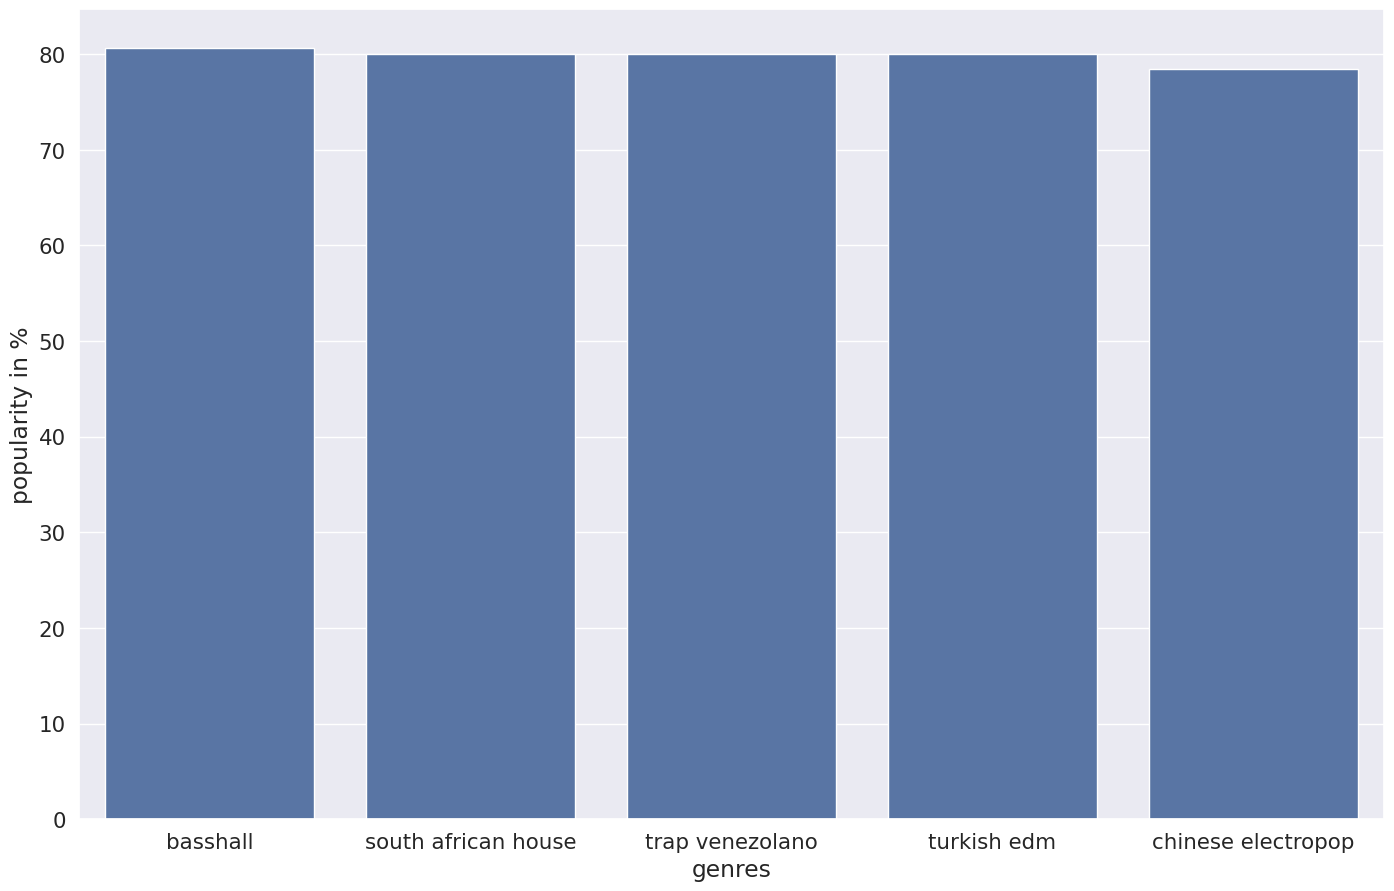

In [12]:
#Visualizing
sns.set(font_scale=1.4)
fig = plt.figure(figsize = (15, 10))
sns.barplot(data=temp, x="genres", y="popularity in %", capsize=.4)

**Query 1: What are the 5 most popular music genres?**
- After visualizing the data, the most popular genres are basshall, south african house, trap venzolano, turkish edm, and chinese electropop

In [13]:
#inspecting correlation
df_copy = df.copy()
correlation=df_copy.corr(numeric_only=True)
correlation_output = correlation['popularity in %'].sort_values(ascending=False, key=lambda x: x.abs())
correlation_output

,popularity in %
popularity in %,1.000000
acousticness,-0.458546
loudness in dB,0.344315
energy,0.337657
instrumentalness,-0.265516
danceability,0.218019
tempo,0.146617
liveness,-0.094092
duration in minutes,-0.071111
speechiness,-0.045112


In [14]:
#visualizing the correlation between popularity and all other attributes
#energy's correlation value was rounded up to 0.34 when plotting the heat map.. however, with the above output, loudness has higher correlation with popularity
sns.set(font_scale=4)
plt.figure(figsize = (130,80))
sns.heatmap(df_copy.corr(numeric_only=True), cmap = 'viridis', annot = True)

<Axes: >

**Query 2: What factors affect the Popularity of the song ? (Mention the biggest 2 factors, with interpretation)**
- After visualizing the data, the most correlated attributes with popularity is acousticness and loudness in dB.
- Popularity and acousticness are negatively correlated (as the acousticness increase, popularity decrease). This means that if acousticness increased by 1, popularity decreases by 0.46.
- Popularity and loudness are positvely correlated (as the loudness increase, popularity increase). This means that if loudness increased by 1, popularity increases by 0.34.
- This indicates that people tend to listen more to amplified music that has high sound quality.

In [15]:
#Copying the main dataframe and sorting it descendingly
df_copy1 = df.copy()
df_copy_highest = df_copy1.sort_values('energy', ascending=False)
temp1 = df_copy_highest.head()
temp1

,genres,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness in dB,speechiness,tempo,valence,popularity in %,key
174,australian ska,0.000096,0.312667,3.528744,0.994667,0.000183,0.1561,-4.356,0.158667,148.061,0.228900,43.333333,9
2705,tennessee metal,0.000891,0.372000,4.400222,0.994333,0.040620,0.1780,-4.621,0.192667,122.180,0.105967,46.000000,11
1896,nederlandse hardstyle,0.076200,0.341000,3.963633,0.994000,0.000000,0.3520,0.060,0.374000,157.607,0.220000,0.000000,1
347,brazilian ska,0.500000,0.320000,2.869600,0.991000,0.000004,0.2260,-7.047,0.220000,167.532,0.545000,13.000000,9
912,dutch death metal,0.000040,0.306000,4.651550,0.989000,0.000410,0.2700,-5.087,0.109000,103.006,0.134000,38.000000,2


<Axes: xlabel='genres', ylabel='energy'>

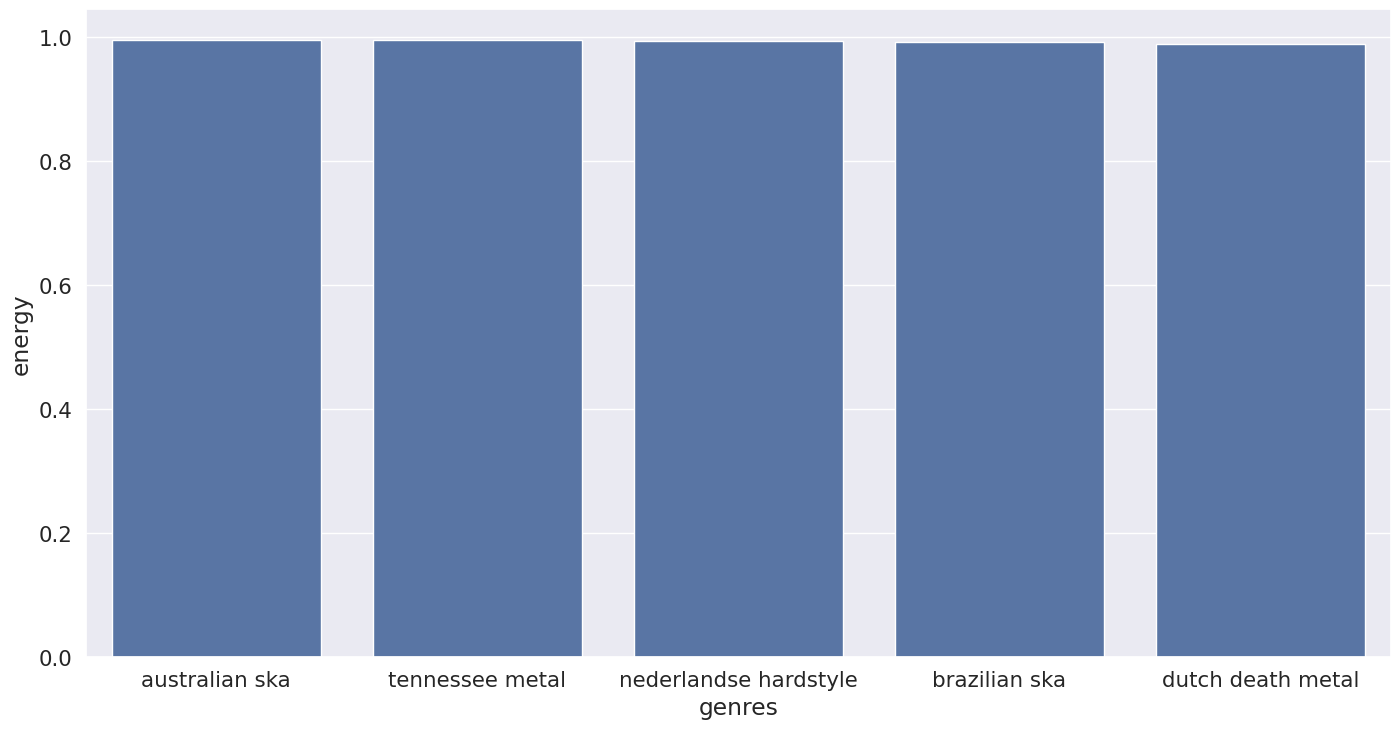

In [16]:
#Visualizing the genre with the highest energy
sns.set(font_scale=1.4)
fig = plt.figure(figsize = (15, 8))
sns.barplot(data=temp1, x="genres", y="energy", capsize=.4)

In [17]:
#Copying the main dataframe and sorting it ascendingly
df_copy_lowest = df_copy1.sort_values('energy', ascending=True)
temp2 = df_copy_lowest.head()
temp2
print(temp2['energy'].min())

0.0010015


<Axes: xlabel='genres', ylabel='energy'>

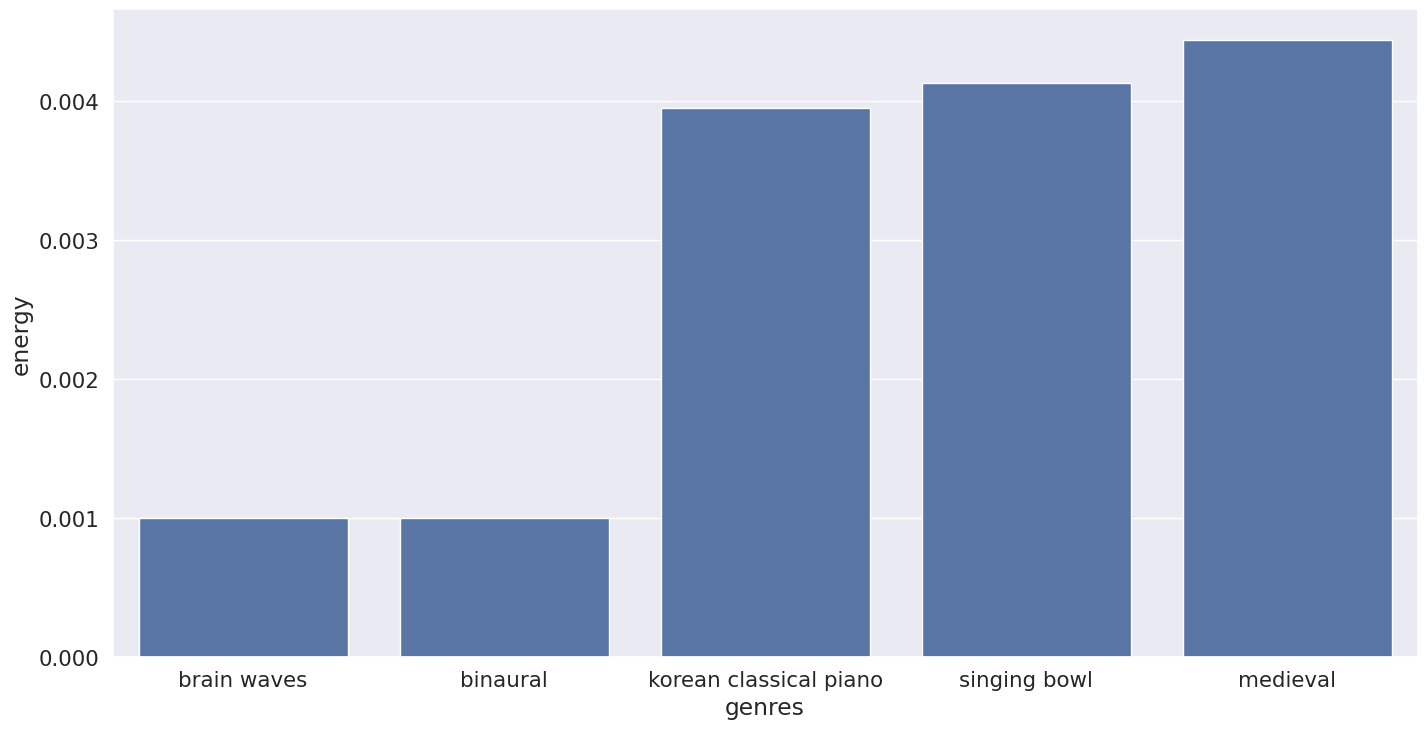

In [18]:
#Visualizing the genre with the lowest energy
sns.set(font_scale=1.4)
fig = plt.figure(figsize = (15, 8))
sns.barplot(data=temp2, x="genres", y="energy", capsize=.4)

**Query 3: Which genre has the highest energy and which has the lowest?**
- Based on our findings, the genre with the highest energy is australian ska, and the genres with the lowest energy is brain waves and binaural (both have the same energy value).

In [19]:
df.corr(numeric_only=True)

,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness in dB,speechiness,tempo,valence,popularity in %,key
acousticness,1.000000,-0.325010,-0.014024,-0.868257,0.273774,-0.076653,-0.737279,-0.086229,-0.397669,-0.178256,-0.458546,-0.078907
danceability,-0.325010,1.000000,-0.160638,0.299788,-0.383103,-0.055143,0.453064,0.242061,0.082864,0.652549,0.218019,0.029557
duration in minutes,-0.014024,-0.160638,1.000000,-0.048202,0.229421,0.018643,-0.137600,0.033247,-0.046865,-0.257512,-0.071111,-0.029289
energy,-0.868257,0.299788,-0.048202,1.000000,-0.324964,0.168303,0.848966,0.119862,0.430789,0.305207,0.337657,0.097237
instrumentalness,0.273774,-0.383103,0.229421,-0.324964,1.000000,-0.050614,-0.537682,-0.196764,-0.201670,-0.424091,-0.265516,-0.069315
liveness,-0.076653,-0.055143,0.018643,0.168303,-0.050614,1.000000,0.123981,0.190112,0.002318,0.000720,-0.094092,0.007279
loudness in dB,-0.737279,0.453064,-0.137600,0.848966,-0.537682,0.123981,1.000000,0.095334,0.407962,0.376596,0.344315,0.083029
speechiness,-0.086229,0.242061,0.033247,0.119862,-0.196764,0.190112,0.095334,1.000000,0.001482,0.092671,-0.045112,0.022294
tempo,-0.397669,0.082864,-0.046865,0.430789,-0.201670,0.002318,0.407962,0.001482,1.000000,0.139605,0.146617,0.081648
valence,-0.178256,0.652549,-0.257512,0.305207,-0.424091,0.000720,0.376596,0.092671,0.139605,1.000000,0.023117,0.063627


In [20]:
#visualizing the correlation between variables
sns.set(font_scale=4)
plt.figure(figsize = (130,80))
sns.heatmap(df.corr(numeric_only=True), cmap = 'viridis', annot = True)

<Axes: >

**Query 4: What are the most correlated pairs of attributes ? (Mention 2 pairs, with interpretation)**
- The pair with the highest correlation is energy and acousticness (-0.87).
> - Energy and acousticness are negatively correlated (as the energy increase, acousticness decrease). This means that if energy increased by 1, acousticness decreases by 0.87.
> - This indicates that energetic music tends to be less acoustic (acoustic means not amplified music).

- The pair with the second highest correlation is energy and loudness (0.85).
>- Energy and loudness are positvely correlated (as the energy increase, loudness increase). This means that if energy increased by 1, loudness increases by 0.85.
>- This indicates that energetic genres have the tendancy to have better sound quality (energy is the fastness, loudness, and noisiness of a track).

- The pair with the third highest correlation is acousticness and loudness (-0.74).
>- Acousticness and loudness are negatively correlated (as the acousticness increase, loudness decrease). This means that if acousticness increased by 1, loudness decreases by 0.74.
>- This indicates that the increase in acousticness compromises the sound quality of the music.

**Data Preparation for Modelling**

In [21]:
#Dropped the genre, since our goal is to allow the model to create clusters based on genre, so including it as independent variable is not logically right
df_copy_modelling = df.copy()
df_copy_modelling = df_copy_modelling.drop('genres', axis=1)

In [22]:
#normalization of needed columns. Included all variables to make them in similar ranges
numerical_columns = ['acousticness', 'danceability', 'duration in minutes', 'energy', 'instrumentalness', 'liveness', 'loudness in dB', 'speechiness', 'tempo', 'valence', 'popularity in %','key']


df_copy_modelling[numerical_columns] = (

    df_copy_modelling[numerical_columns] - df_copy_modelling[numerical_columns].min()

) /(

    df_copy_modelling[numerical_columns].max() - df_copy_modelling[numerical_columns].min()
)
df_copy_modelling.head()


,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness in dB,speechiness,tempo,valence,popularity in %,key
0,0.983266,0.121527,0.055005,0.070763,0.611727,0.361911,0.246166,0.018177,0.179536,0.102832,0.345041,0.545455
1,0.496766,0.277988,0.432864,0.452544,0.481615,0.116016,0.596180,0.057476,0.465697,0.223620,0.650826,0.454545
2,0.765060,0.751175,0.035818,0.822207,0.883065,0.110685,0.779396,0.025151,0.549467,0.994880,0.595041,0.636364
3,0.679274,0.552759,0.067903,0.317443,0.003028,0.160007,0.700623,0.064018,0.413650,0.455534,0.568017,0.636364
4,0.461053,0.526622,0.132780,0.444229,0.856519,0.102225,0.629173,0.024627,0.514082,0.311241,0.539256,0.090909


**Modelling**

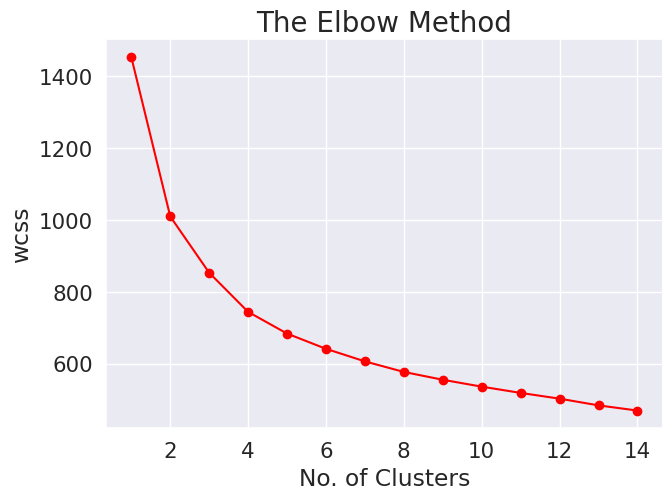

In [23]:
# 15 was chosen as the upper limit since it clearly shows that the slope is decreasing linearly in a consistent manner, and more than 15 doesn't show different data
sns.set(font_scale=1.4)
wcss = []
for i in range(1,15):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df_copy_modelling)
    wcss.append(km.inertia_)

plt.plot(range(1, 15), wcss, marker='o', color='red')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [24]:
#We chose the k as 6 as the slope seems to be decresing linearly from 6 till 14
km = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(df_copy_modelling)

labels = km.labels_
labels

array([2, 2, 3, ..., 4, 0, 4], dtype=int32)

In [25]:
df_copy_modelling.head()

,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness in dB,speechiness,tempo,valence,popularity in %,key
0,0.983266,0.121527,0.055005,0.070763,0.611727,0.361911,0.246166,0.018177,0.179536,0.102832,0.345041,0.545455
1,0.496766,0.277988,0.432864,0.452544,0.481615,0.116016,0.596180,0.057476,0.465697,0.223620,0.650826,0.454545
2,0.765060,0.751175,0.035818,0.822207,0.883065,0.110685,0.779396,0.025151,0.549467,0.994880,0.595041,0.636364
3,0.679274,0.552759,0.067903,0.317443,0.003028,0.160007,0.700623,0.064018,0.413650,0.455534,0.568017,0.636364
4,0.461053,0.526622,0.132780,0.444229,0.856519,0.102225,0.629173,0.024627,0.514082,0.311241,0.539256,0.090909


In [26]:
#Creating a new column called cluster
df_copy_modelling['cluster'] = labels

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

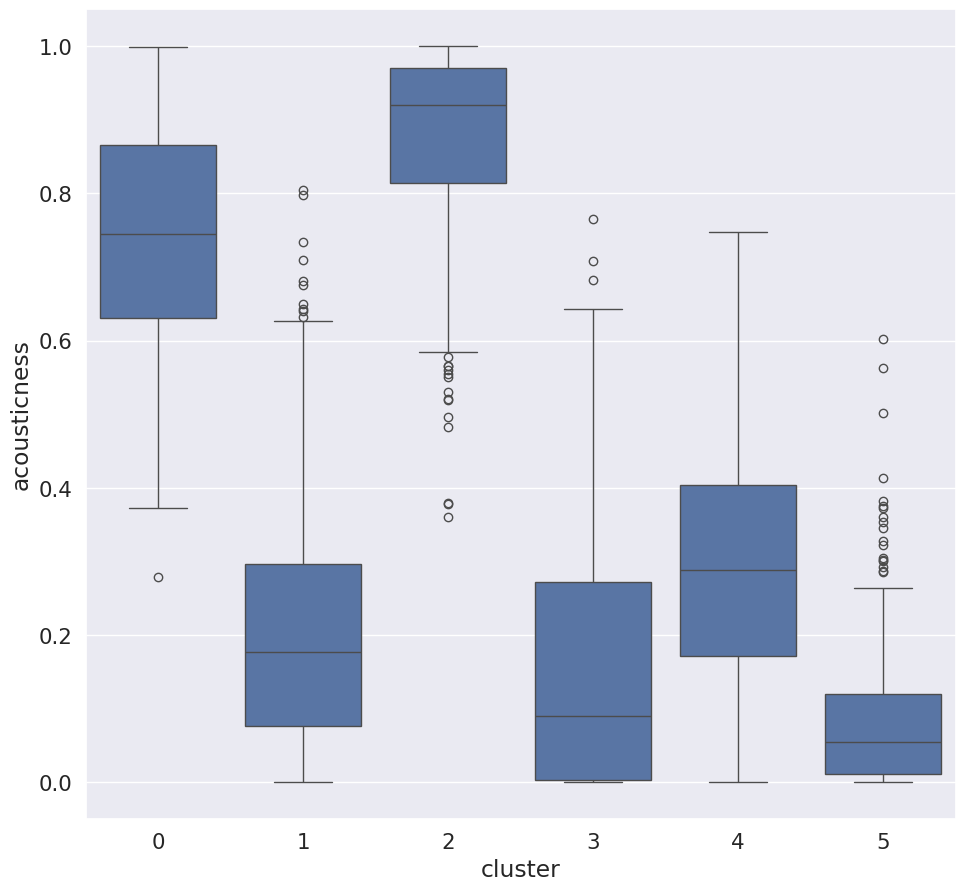

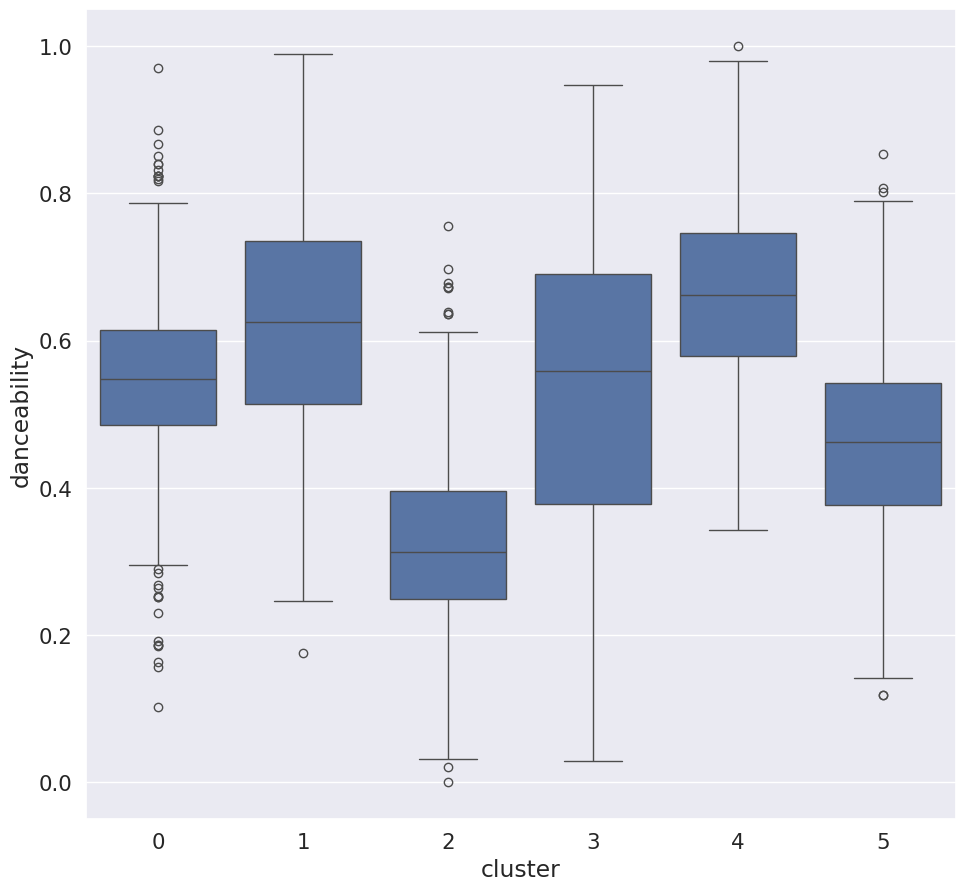

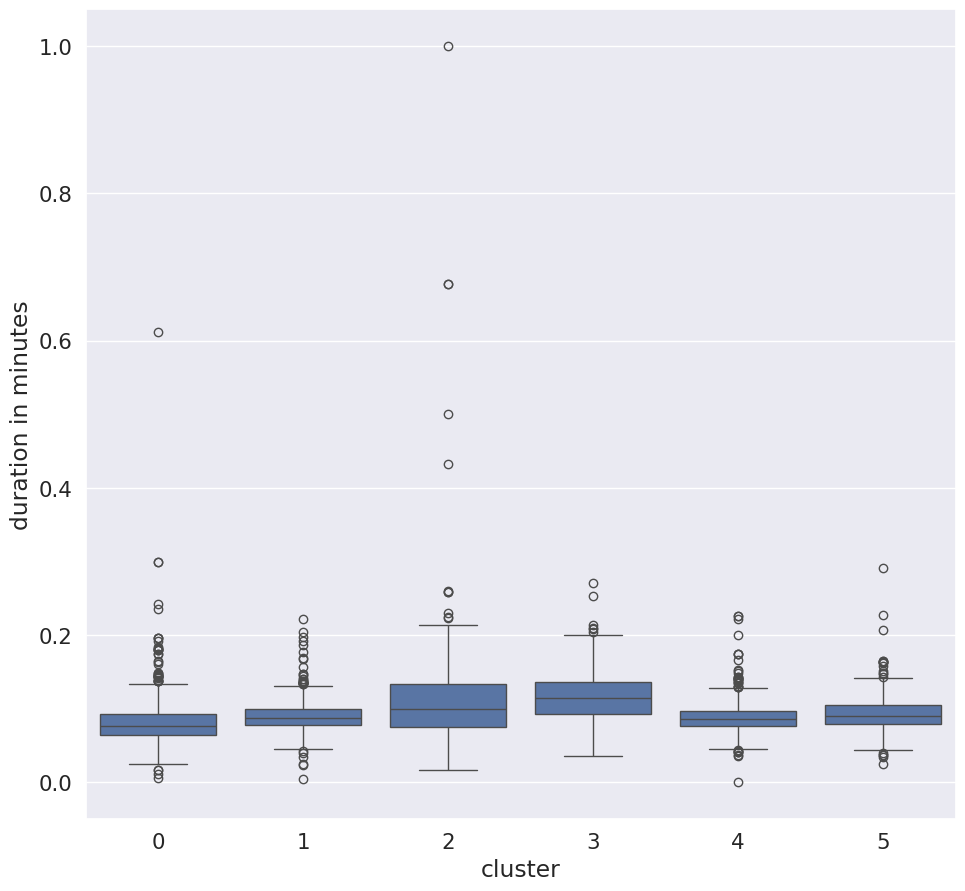

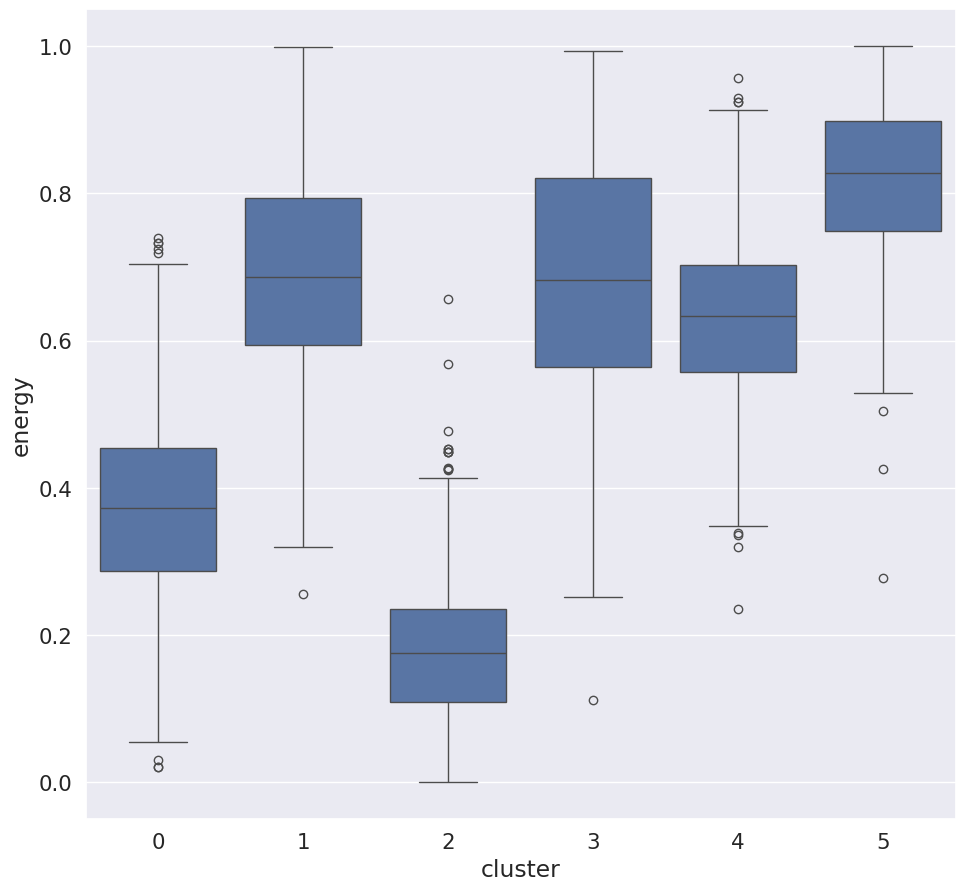

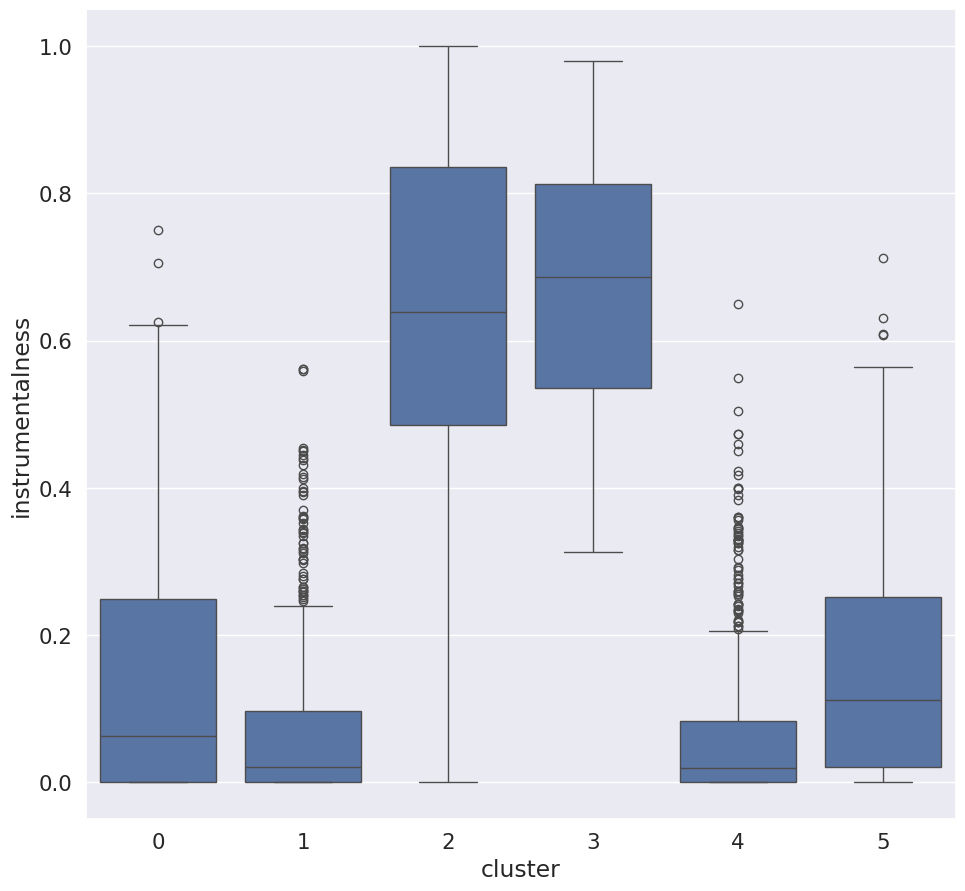

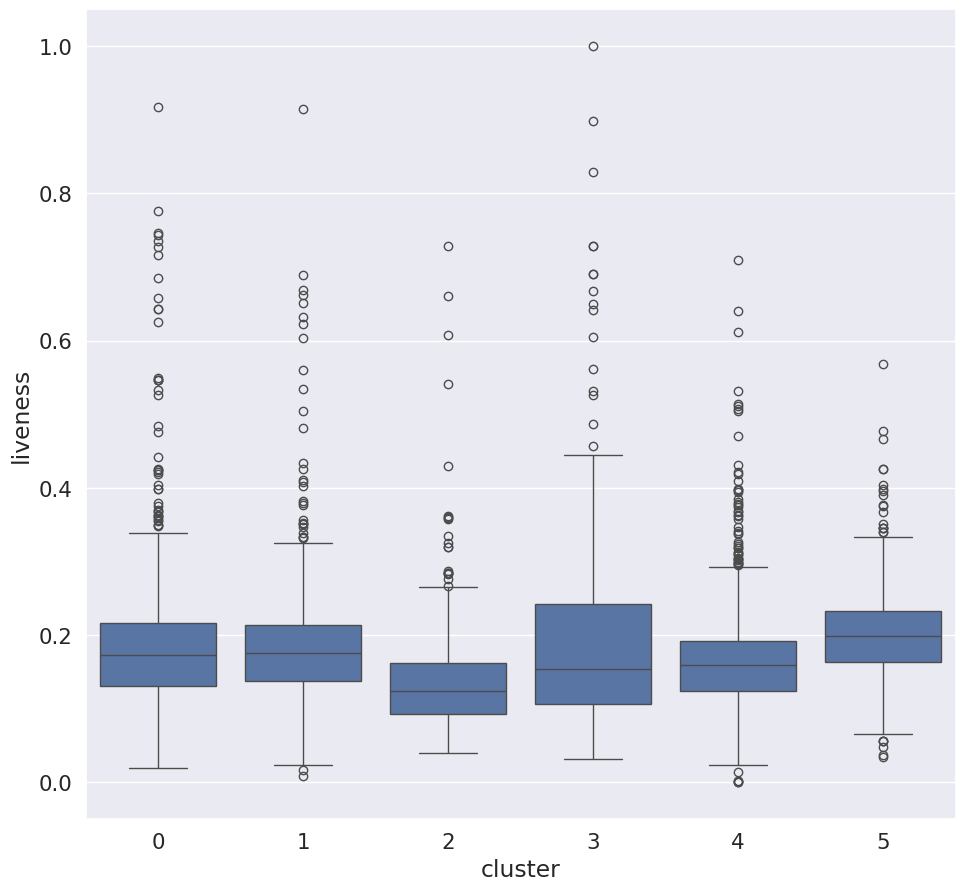

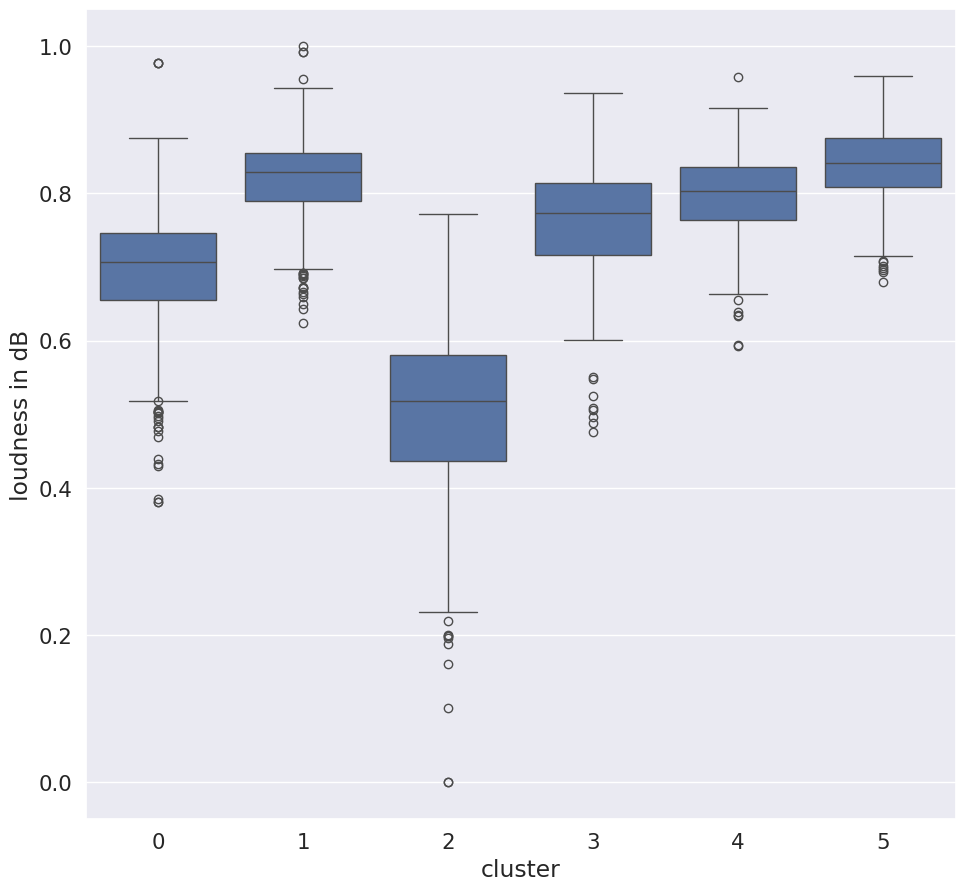

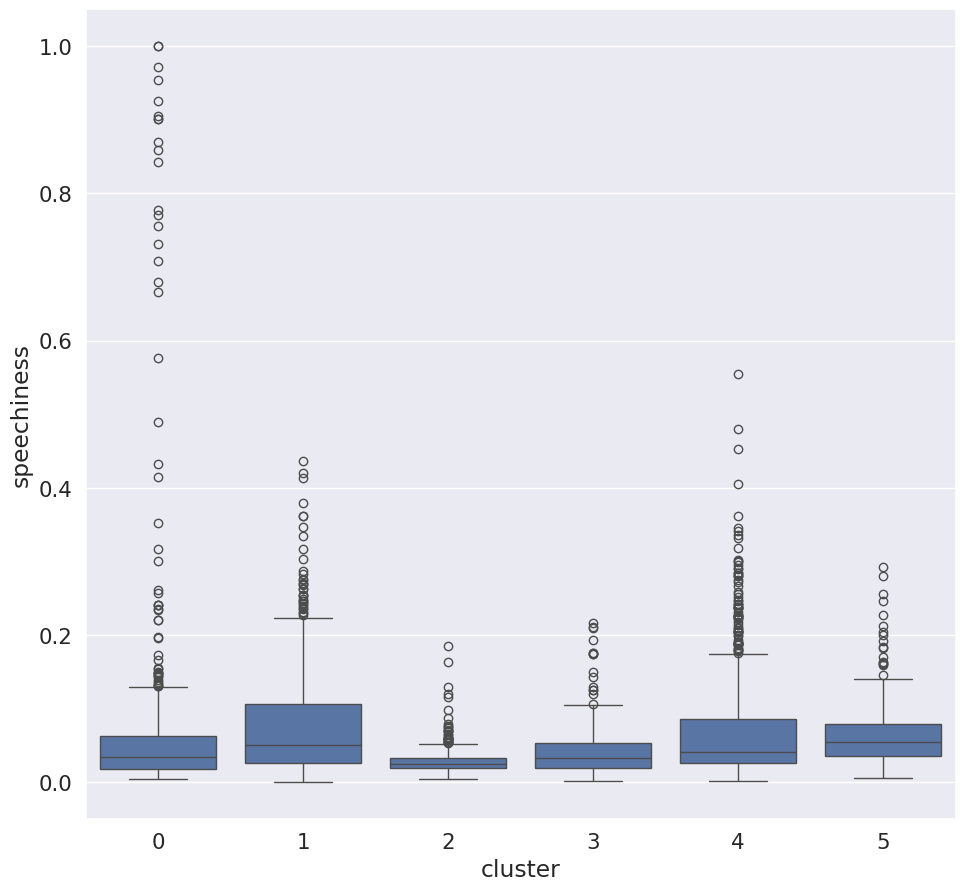

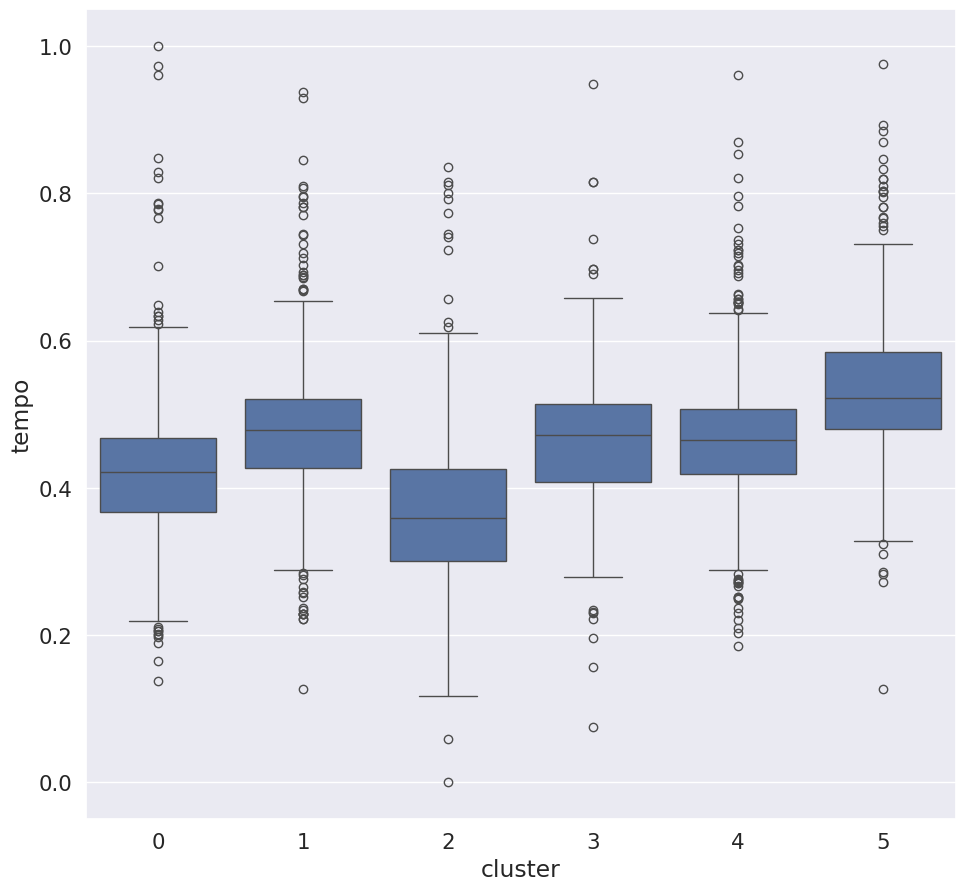

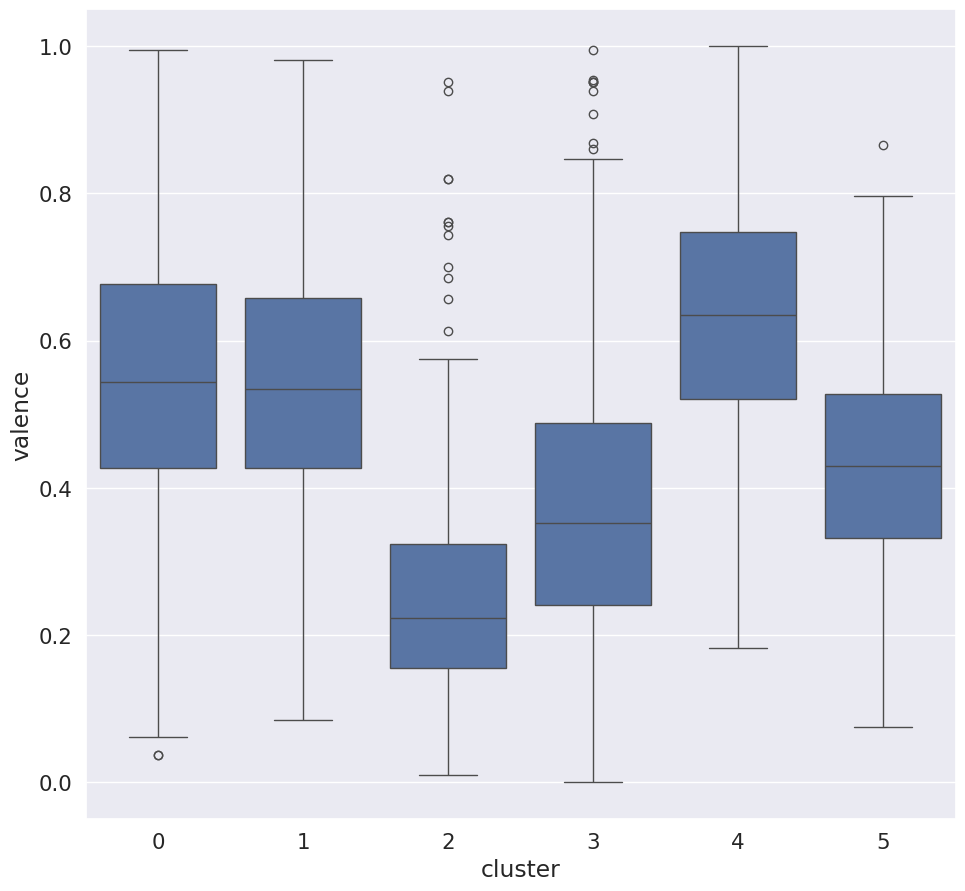

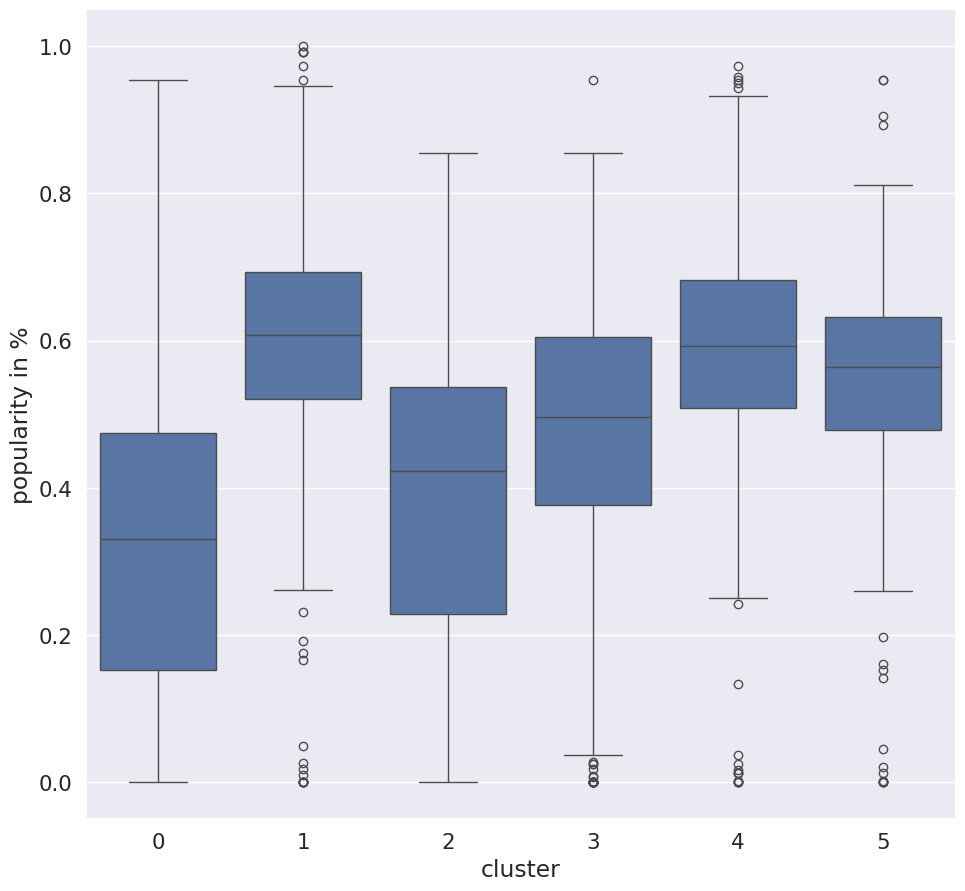

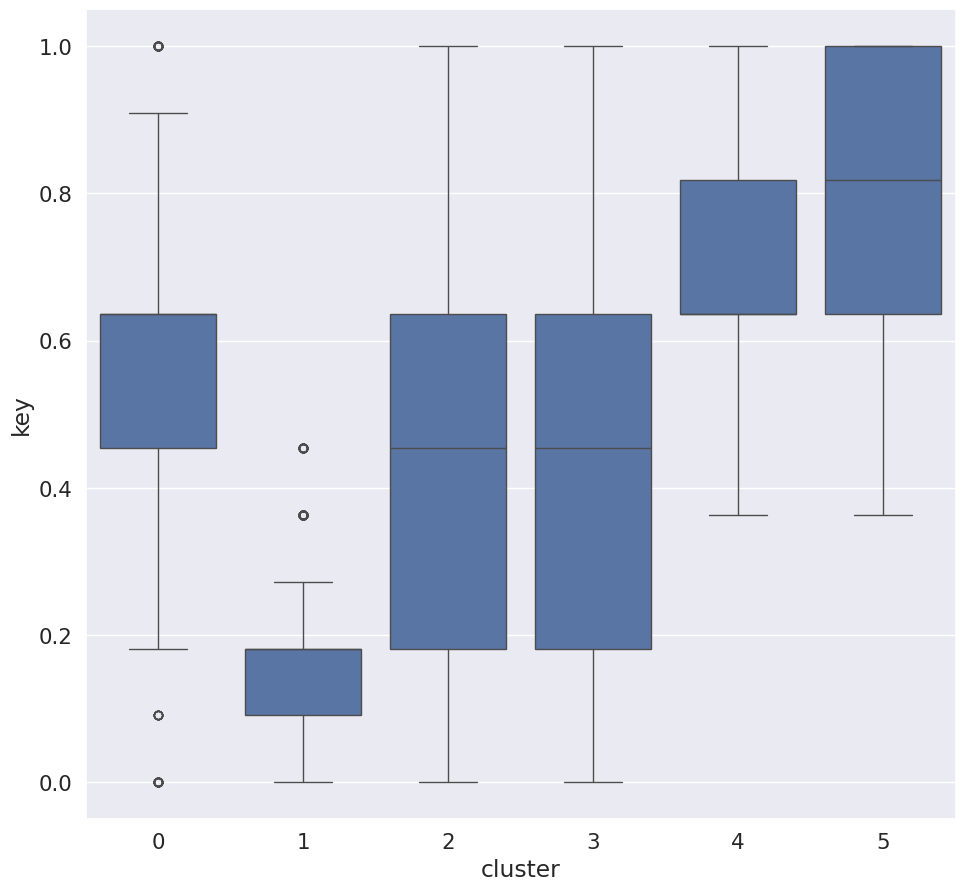

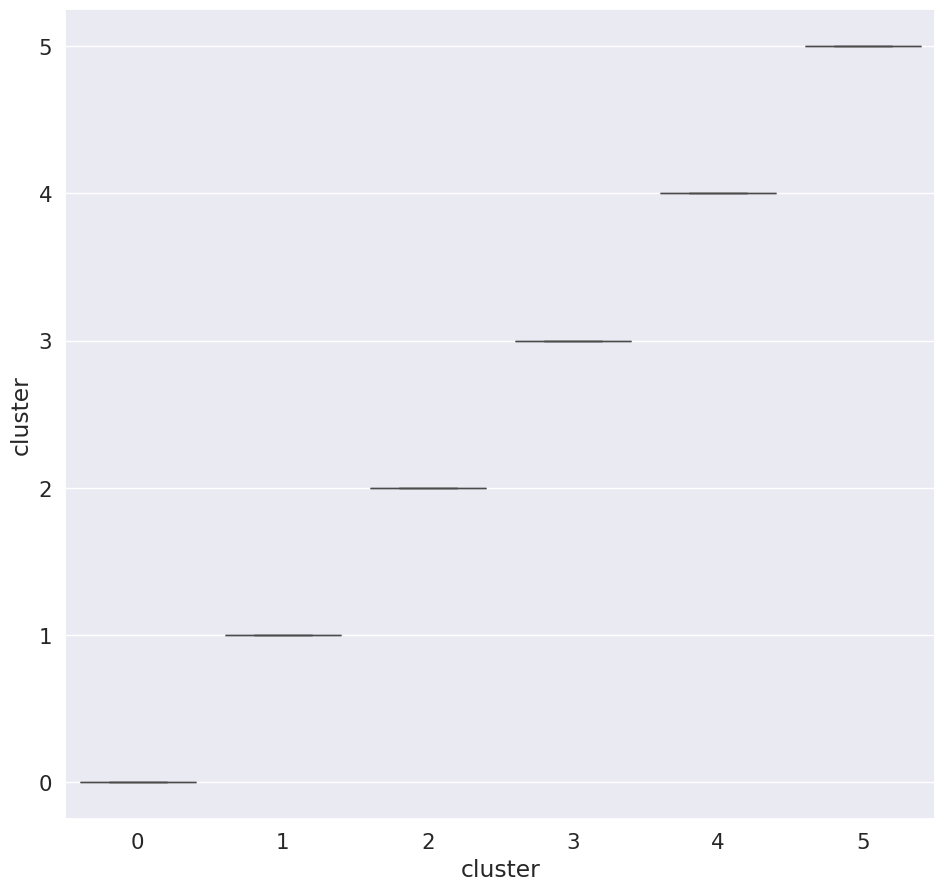

In [27]:
#Visualizing clusters with respect to their features
for col in df_copy_modelling.select_dtypes('number').columns:
    plt.figure(figsize = (10, 10))
    sns.boxplot(x='cluster', y=col, data=df_copy_modelling)

**Basing our findings on the median of the box plots**

Cluster 0:

>-Acousticness: this cluster has the lowest median which indicates that this genre has the lowest acousticness (unamplified music).

>-Danceability:This cluster has the second lowest median value of danceability, meaning that genres in this cluster have danceablity values higher than. cluster  1

>-Duration in mins: This cluster has a duration median that is nearly equal to median value of cluster 5, however it has a slightly smaller range than cluster 5.


>-Energy: This cluster has the highest median which indicates that these
genres has the most energetic music.


>-Instrumentalness: This cluster has the second highest range and median value, meaning it has the second highest amount of intrumental music genre with the second highest values.

>-Liveness: This cluster has the second highest median which indicates that
genres in this cluster have high liveness.

>-Loudness in dB: This cluster conatins the highest median value of loudness, which means that the approximate value of sound quality of genres in this cluster is the highest

>-Speechiness: This cluster has a slightly higher median than cluster 3 which
indicates that genres in this cluster has slightly higher speechiness

>-Tempo: This cluster has the highest median value, meaning that the approximate tempo of genres in this clusters is the highest off all clusters.

>-Valence: This cluster has a slightly lower median than cluster 4 which
indicates that genres in this cluster have slightly higher valence

>-Popularity: This cluster has a slightly lower median than cluster 5 which
indicates that genres in this cluster have slightly less popularity than
genres in cluster 5

>-Key: This cluster has a median value approximately equal to clusters 3 and 5, meaning that pitches of genres in this cluster is approxiamtely equal to pitch values in both clusters 3 and 5, as for the range this cluster has the second highest range which is approxiamtely equal to range of clusters 1 and 2, which is the second highest range, meaning it contains the second highest amount of genres.

Cluster 1:


>-Acousticness: This cluster has the highest median visible, which indicated that this genre contains music with the highest acoustiness.

>-Danceability:This cluster has the lowest median value of danceability, containing genre with lowest danceability value.

>-Duration in mins: This cluster has the highest median which indicates that these
genres have the longest duration

>-Energy: This cluster has the lowest median, which indicates that genres
in this cluster have the least energetic music.

>-Instrumentalness: This cluster has the widest range and highest median value, meaning it contains most of the instrumental music genre, the approximate instrumental value of this genre in this cluster is the highest.

>-Liveness: This cluster has the lowest median which indicates that genres
in this cluster have the lowest liveness

>-Loudness in dB: This cluster has the lowest median value, meaning that approximate values of loudness representing sound quality are the lowest.

>-Speechiness: This cluster has the lowest median and smallest distribution
which indicates that genres in this cluster has the least speechiness
and this cluster has the least genres

>-Tempo: This cluster has the genre with the least tempo value and the second lowest median value, meaning the approximate values of tempo in this cluster are the second lowest.

>-Valence: This cluster has the lowest median which indicates that genres
in this cluster have the least valence

>-Popularity: This cluster has less median than cluster 0 which indicates that
genres in this cluster are less popular than genres in cluster 0

>-Key: this cluster has an approximately equal range to clusters 0 and 2 meaning they contain approximately the same amount of genres and it has the lowest median value, meaing that the approximpate value of pitches to genres in this cluster is the lowest.

Cluster 2:


>-Acousticness: This cluster has a median value higher than clusters 0and 5, yet lower than clusters 1,3,and 4 indicating that it has a bit of acoustic music.

>-Danceability:This cluster has the highest median value of danceability, containing genre with highest danceability value.

>-Duration in mins: This cluster has a median between cluster 1 and 3 which means
that these genres has duration time less than genres in cluster 1
and more than genres in cluster 3.
It also has the smallest range of distribution which indicates that it
has the least genres.

>-Energy: This cluster has a median lower than cluster 0 and higher
than cluster 5 which indicates that these genres has an energy level
between those in cluster 0 and 5

>-Instrumentalness: This cluster contains the genre with approximately lowest intrumental values and it contains the least amount of instrumental music as it has the least range.

>-Liveness: This cluster has slightly less median than cluster 3 and also
it has the smallest distribution. this indicates that genres in this
cluster have liveness less than genres in cluster 3, and also that
this cluster have the least genres

>-Loudness in dB: This cluster has the least range of all clusters meaning that it contains the least genres

>-Speechiness: This cluster has a slightly higher median than cluster 3 which
indicates that genres here has higher speechiness than genres in cluster 3

>-Tempo: this cluster has a range nearly equal to cluster 3 whcih means that they both contain almost same number of genres, however cluster 2 has a slightly higher median value, having an approximate higher level of tempo  in genres.

>-Valence: This cluster has the highest median which indicates that genres
in this cluster has the highert valence

>-Popularity: This cluster has the highest median which indicates that genres
in this cluster are the most popular


>-Key: This cluster is an exact replica of cluster 1, this assumption is based on both clusters having the same maximum and minimum upper quartile and lower quartile; so we deduced that they have the same median. This assumption is supported by, the method of dividing data on 2 clusters in order to divide processing time to be more efficient rather than having one huge cluster with huge processing time (our assumption why the median is not visible).

Cluster 3:


>-Acousticness: This cluster has an approximately equal median value of acoustic music as cluster 4, however it has a slightly higher range than cluster 3.

>-Danceability: This cluster has the second smallest range, containg more danceable music genre than cluster 4, however the median value danceable genre is lower than cluster 4.

>-Duration in mins: This cluster has the lowest median, which indicates that genres in this cluster have the least duration

>-Energy: This cluster has a median slightly higher than cluster 4 which
indicates that genres in this cluster are slightly more energetic

>-Instrumentalness: This cluster has an adequate amount of instrumental music genre, but the median value is less than cluster 0, thus approximate intrumental value is less.

>-Liveness: This cluster has slightly higher median than cluster 2 which
indicates that genres in this cluster have slightly more liveness than
genres in cluster 2

>-Loudness in dB: This cluster contains genres more than cluster 2, due to it's range being wider, but has a less median value meaning its approximate sound quality is lower.

>-Speechiness: This cluster has a slightly higher median than cluster 1 which
indicates that genres in this cluster has slightly higher speechiness

>-Tempo: This cluster has a slightly less approximate value of tempo in genres than cluster 2, and it has a smaller minimum value than cluster 2.

>-Valence: This cluster has an equal median to cluster 5 which indicates
that both have genres with the same valence, however, cluster 5 have
wider distribution

>-Popularity: This cluster has less median than cluster 1 which indicates that
genres in this cluster are less popular than genres in cluster 1. This cluster
also have approximately the same distribution as cluster 4 which indicates that
both clusters nearly have the same amount of genres.

>-Key: This cluster has a median value approximately equal to cluster 0 and cluster 5, meanig nearly equal values of pitches, however it has a smaller range than both clusters meaning it contains less genres than both clusters.

Cluster 4:


>-Acousticness: This cluster has an approximately equal median value of acoustic music as cluster 3, but slightly higher median vlaue.

>-Danceability:This cluster has the smallest range, meaning it has the least amount of dancable music genre.

>-Duration in mins: This cluster has a slightly higher median than cluster 0. It
also has the widest range of distribution which indicates that it has
more genres.

>-Energy: This cluster has a median slightly less than cluster 3 which
indicates that genres in this cluster are slightly less energetic.
It also has the widest distribution which indicates that most of the
genres lie in this cluster

>-Instrumentalness: This cluster does not contain any instrumental music genre.

>-Liveness: This cluster has the highest median and widest distribution
which indicates that genres in this cluster has the highest liveness,
and also that this cluster has the most genres

>-Loudness in dB: This cluster has the widest range, meaning it contains the highest number genres

>-Speechiness: This cluster has the highest median and widest distribution
which indicates that genres in this cluster has the highest speechiness
and that most genres are included in this cluster

>-Tempo: This cluster contains the lowest median value, meaning that the approximate value of tempo for genres in this cluster is the lowest of all clusters.

>-Valence: This cluster has a slightly higher median than cluster 0 which
indicates that genres in this cluster have slightly higher valence than
genres in cluster 0.

>-Popularity: This cluster has the lowest median which indicates that genres in this cluster are the least popular. Also this cluster have approximately the same distribution as cluster 3 which indicates that both clusters nearly have
the same amount of genres.

>-Key: This cluster has the highest median value visible, whcih means it has the highest approximate values of pitches.

Cluster 5:


>-Acousticness: This cluster has the second lowest median level of acoustic music genre and the widest range of acoustic music visble.

>-Danceability:This cluster has the widest range, meaning it contains most of the genres that are dancable.

>-Duration in mins: This genre has a slightly lower median that cluster 0.


>-Energy: This cluster has the second highest median and the second
widest distribution.


>-Instrumentalness: This cluster has the second lowest median value and range, meaning it has the second lowest amount of intrumental music genre with the second lowest values.

>-Liveness: This cluster has nearly the same median as cluster 2 which
indicates that they have genres with nearly the same level of liveness,
however, cluster 5 has wider range of distribution

>-Loudness in dB: this cluster contains the maximum level of loundess in genres and also has the second highest median value, which means that it has the second approximately highest sound quality genres.

>-Speechiness: This cluster has slightly higher median than cluster 3 which
indicates that genres in this cluster have slightly higher speechiness

>-Tempo: this cluster has the second highest median value, meaning its tempo values in the gnres are appreoximately the second highest, and it contains the genre with the highest tempo value. The range of this cluster is nearly equal to the range of cluster 1.

>-Valence: This cluster has an equal median to cluster 3 which indicates
that both have genres with the same valence, however, this cluster have
wider distribution which indicates that more genres present in this cluster

>-Popularity: This cluster has the second highest median which indicates that genres in this cluster are the second most popular.

>-Key: This cluster has the widest range,which means that it contains the most genre than all clusters. This cluster also has an approximately equal median level as cluster 0 and cluster 3, meaning that they have an approximate equal value of pitches.


In [28]:
#Creating genres column in df_copy_modelling
df_copy_modelling['genres'] = df['genres']
df_copy_modelling.head()

,acousticness,danceability,duration in minutes,energy,instrumentalness,liveness,loudness in dB,speechiness,tempo,valence,popularity in %,key,cluster,genres
0,0.983266,0.121527,0.055005,0.070763,0.611727,0.361911,0.246166,0.018177,0.179536,0.102832,0.345041,0.545455,2,21st century classical
1,0.496766,0.277988,0.432864,0.452544,0.481615,0.116016,0.596180,0.057476,0.465697,0.223620,0.650826,0.454545,2,432hz
2,0.765060,0.751175,0.035818,0.822207,0.883065,0.110685,0.779396,0.025151,0.549467,0.994880,0.595041,0.636364,3,8-bit
3,0.679274,0.552759,0.067903,0.317443,0.003028,0.160007,0.700623,0.064018,0.413650,0.455534,0.568017,0.636364,0,a cappella
4,0.461053,0.526622,0.132780,0.444229,0.856519,0.102225,0.629173,0.024627,0.514082,0.311241,0.539256,0.090909,3,abstract


In [29]:
#Creating a dataframe containing genres and cluster and grouping by cluster to be able to visualize genres based on their clusters
X = df_copy_modelling[['genres', 'cluster']].copy()
X = X.groupby('cluster')

In [30]:
X.head()

,genres,cluster
0,21st century classical,2
1,432hz,2
2,8-bit,3
3,a cappella,0
4,abstract,3
5,abstract beats,4
6,abstract hip hop,1
7,accordeon,1
8,accordion,0
9,acid house,5
